In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_extraction import text
from sklearn import pipeline as pip
from sklearn import naive_bayes as nb
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from sklearn import model_selection as mod
from sklearn import discriminant_analysis as dis
from sklearn import preprocessing as pre
from sklearn import decomposition as dec
from sklearn.base import BaseEstimator, TransformerMixin

from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.casual import casual_tokenize

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data = pd.read_csv("/content/sms_spam.csv")
data.set_index("index", inplace=True)
data.head()

,spam,text
index,,
sms0,0,"Go until jurong point, crazy.. Available only ..."
sms1,0,Ok lar... Joking wif u oni...
sms2!,1,Free entry in 2 a wkly comp to win FA Cup fina...
sms3,0,U dun say so early hor... U c already then say...
sms4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.spam.value_counts().max()/data.spam.value_counts().sum()

0.8681000620219144

In [ ]:
X_train, X_test, y_train, y_test = mod.train_test_split(data.text, data.spam, test_size=0.33, random_state=42)

In [ ]:
pd.Series(y_train).value_counts().max() / pd.Series(y_train).value_counts().sum()

0.8675925925925926

In [ ]:
X_train

index
sms4043!    Buy Space Invaders 4 a chance 2 win orig Arcad...
sms4226             I want  &lt;#&gt;  rs da:)do you have it?
sms4484     Pls she needs to dat slowly or she will vomit ...
sms3423!    Claim a 200 shopping spree, just call 08717895...
sms2389                          R ü going 4 today's meeting?
                                  ...                        
sms4426     Lol no. I just need to cash in my nitros. Hurr...
sms466      This is hoping you enjoyed your game yesterday...
sms3092     Its  &lt;#&gt; k here oh. Should i send home f...
sms3772                        COME BACK TO TAMPA FFFFUUUUUUU
sms860!     WIN a year supply of CDs 4 a store of ur choic...
Name: text, Length: 3240, dtype: object

In [ ]:
def myOwnTokenizer(d):
  tokens = casual_tokenize(d)
  return tokens
  #return filter(lambda x:len(x) > 1, tokens)

def convertToArray(X):
  return X.toarray()

pipe_lda = pip.Pipeline([
        ("vect", text.TfidfVectorizer(lowercase=False, tokenizer=myOwnTokenizer)),
        ("toarray", pre.FunctionTransformer(convertToArray)),
        ("lda", dis.LinearDiscriminantAnalysis(n_components=1))
])

mod.cross_val_score(pipe_lda, X_train, y_train, cv=3).mean()

In [ ]:
def myOwnTokenizer(d):
  tokens = casual_tokenize(d)
  return tokens
  #return filter(lambda x:len(x) > 1, tokens)

def convertToArray(X):
  return X.toarray()

In [ ]:
pipe_pca = pip.Pipeline([
        ("vect", text.TfidfVectorizer(lowercase=False, tokenizer=myOwnTokenizer)),
        ("toarray", pre.FunctionTransformer(convertToArray)),
        ("pca", dec.PCA(n_components=16)),
        ("lda", dis.LinearDiscriminantAnalysis(n_components=1))
])

mod.cross_val_score(pipe_pca, X_train, y_train, cv=3).mean()

0.9500000000000001

In [ ]:
pipe_pca = pip.Pipeline([
        ("vect", text.TfidfVectorizer(lowercase=False, tokenizer=myOwnTokenizer)),
        ("toarray", pre.FunctionTransformer(convertToArray)),
        ("pca", dec.PCA(n_components=16)),
])
X_train_pca = pipe_pca.fit_transform(X_train)

In [ ]:
len(X_train)

3240

In [ ]:
X_train_pca.shape

(3240, 16)

In [ ]:
len(pipe_pca[0].get_feature_names())

9442

In [ ]:
pipe_pca[2].components_.shape

(16, 9442)

In [ ]:
X_train_pca[:3]

array([[-0.00639977,  0.06532221, -0.08160546, -0.02665664, -0.04691725,
         0.02497698,  0.00646163, -0.03025783, -0.02225674, -0.00960611,
        -0.01945895, -0.043444  ,  0.03749388, -0.01165751, -0.01885173,
        -0.03525776],
       [-0.05739484, -0.16449939,  0.1683625 , -0.08905109,  0.12385508,
        -0.0132055 ,  0.01887385, -0.1518987 , -0.02987555,  0.1232523 ,
         0.0810034 ,  0.05405624,  0.17816707,  0.21687927,  0.12409351,
         0.0655853 ],
       [-0.024125  ,  0.07556292, -0.03574506, -0.02875504,  0.00958294,
        -0.009895  , -0.0258231 , -0.05545518,  0.02377341,  0.04602631,
        -0.02580092, -0.06552526,  0.03043382,  0.00152099,  0.01365901,
        -0.0243333 ]])

In [ ]:
train_mean = pipe_pca[0].transform(X_train).toarray().mean(axis=0)
train_mean.shape

(9442,)

In [ ]:
temp = pipe_pca[0].transform(X_train[:3]).toarray() - train_mean
temp.shape

(3, 9442)

In [ ]:
np.set_printoptions(suppress=True)
temp.dot(pipe_pca[2].components_.T)

array([[-0.00639977,  0.06532221, -0.08160546, -0.02665664, -0.04691725,
         0.02497698,  0.00646163, -0.03025783, -0.02225674, -0.00960611,
        -0.01945895, -0.043444  ,  0.03749388, -0.01165751, -0.01885173,
        -0.03525776],
       [-0.05739484, -0.16449939,  0.1683625 , -0.08905109,  0.12385508,
        -0.0132055 ,  0.01887385, -0.1518987 , -0.02987555,  0.1232523 ,
         0.0810034 ,  0.05405624,  0.17816707,  0.21687927,  0.12409351,
         0.0655853 ],
       [-0.024125  ,  0.07556292, -0.03574506, -0.02875504,  0.00958294,
        -0.009895  , -0.0258231 , -0.05545518,  0.02377341,  0.04602631,
        -0.02580092, -0.06552526,  0.03043382,  0.00152099,  0.01365901,
        -0.0243333 ]])

# SVD

In [ ]:
class centerData(BaseEstimator, TransformerMixin):

  def fit(self, X, y=None): # for train only
    self.mean = X.mean(axis=0)
    return self
    
  def transform(self, X, y=None): # both train and test
    return X - self.mean

In [ ]:
pipe_svd = pip.Pipeline([
        ("vect", text.TfidfVectorizer(lowercase=False, tokenizer=myOwnTokenizer, ngram_range=(2,2))),
        ("centering", centerData()),
        ("pca", dec.TruncatedSVD(n_components=16, n_iter=100)),
])
X_train_svd = pipe_svd.fit_transform(X_train)

In [ ]:
X_train_svd[:3]

array([[-0.00640075,  0.06532031, -0.08162648, -0.02666556, -0.04681782,
         0.02507095,  0.00631175, -0.03015197, -0.02214532, -0.00962254,
        -0.01940295, -0.04179116,  0.03748726,  0.00212807, -0.02215952,
        -0.02876928],
       [-0.05739298, -0.1644824 ,  0.16830024, -0.08901153,  0.12375722,
        -0.01277814,  0.01859548, -0.15009793, -0.02935068,  0.1256266 ,
         0.0802498 ,  0.05374593,  0.1786291 , -0.19649817,  0.16468816,
         0.05497592],
       [-0.02412541,  0.07557722, -0.03569328, -0.02877414,  0.00962721,
        -0.00997721, -0.02494212, -0.05544626,  0.02340487,  0.04543021,
        -0.0258472 , -0.06181375,  0.02090541, -0.00837963,  0.01268731,
        -0.03678081]])

In [ ]:
pipe_svd[2].components_.shape

(16, 9442)

In [ ]:
features = np.array(pipe_svd[0].get_feature_names())

for topicID in range(16):
  #topicID = 0
  imp_indexes = pipe_svd[2].components_[topicID].argsort()[::-1][:50]
  imp_tokens = features[imp_indexes]
  print("Topic #" + str(topicID) + ":", imp_tokens)

Topic #0: ["I'll call" 'call later' 'Sorry ,' ", I'll" 'in meeting' 'later in'
 'later ok' 'ok bye' 'meeting .' 'call you' 'you later' "meeting I'll"
 'you when' 'meeting sir' "when I'm" 'text you' "I'll text" ', in' 'sir .'
 'Cool ,' 'call Arul' 'to trade' 'related to' 'thing related'
 'trade please' 'meeting any' 'Arul .' "I'll see" 'any thing' 'you in'
 'am in' 'in a' 'later .' "I'll ask" 'come by' '. <#>' "I'm close" 'a few'
 "I'll be" 'a bit' 'to bed' 'work something' "I'll work" 'something out'
 'please call' "K I'll" 'Aight ,' 'Oh fine' "I'll let" 'by tonight']
Topic #1: ['a £' '. Valid' 'prize GUARANTEED' 'Valid 12hrs' '. Call' 'GUARANTEED .'
 '12hrs only' '. Claim' 'URGENT !' 'to contact' 'draw shows' 'won a'
 'are trying' 'shows that' 'We are' 'line .' 'from land' 'trying to'
 'land line' '! We' 'have won' 'that you' 'you have' 'contact U'
 'Todays draw' '. Todays' 'U .' '£ 2000' '2000 prize' '800 prize' '! Your'
 '£ 800' 'Last weekends' 'weekends draw' 'contact you' '3030 .'

In [ ]:
X_train_svd.shape

(3240, 16)

In [ ]:
X_train_svd_small = X_train_svd[:10]
norm = np.linalg.norm(X_train_svd_small, axis=1).reshape(-1,1)
X_train_svd_small = X_train_svd_small / norm
sims = X_train_svd_small.dot(X_train_svd_small.T)
sims.shape

(10, 10)

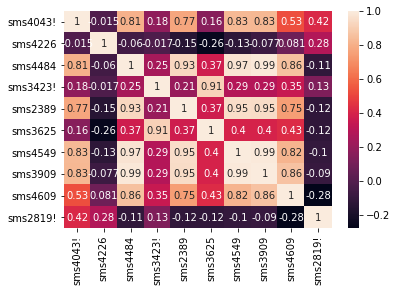

In [ ]:
sns.heatmap(sims, annot=True, xticklabels=X_train.index[:10], yticklabels=X_train.index[:10])

In [ ]:
for i in range(10):
  print(X_train[i])

Buy Space Invaders 4 a chance 2 win orig Arcade Game console. Press 0 for Games Arcade (std WAP charge) See o2.co.uk/games 4 Terms + settings. No purchase
I want  &lt;#&gt;  rs da:)do you have it?
Pls she needs to dat slowly or she will vomit more.
Claim a 200 shopping spree, just call 08717895698 now! Have you won! MobStoreQuiz10ppm
R ü going 4 today's meeting?
Huh i cant thk of more oredi how many pages do we have?
Sent me ur email id soon
Hi did u decide wot 2 get 4 his bday if not ill prob jus get him a voucher frm virgin or sumfing 
When you guys planning on coming over?
UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 and speak to a live operator to claim either Bahamas cruise of£2000 CASH 18+only. To opt out txt X to 07786200117


In [ ]:
a = [
     [3, 5, 8],
     [2, 12, 1]
    ]
np.linalg.norm(a, axis=1).reshape(-1,1)

array([[ 9.89949494],
       [12.20655562]])

In [ ]:
np.sqrt(149)

12.206555615733702

# Classes

In [ ]:
class Car:
  def __init__(self, b, k, year): # constructor
    self.brand = b
    self.km = k
    self.year = year
  
  def getBrand(self):
    return self.brand
  
  def getKM(self):
    return self.km
  
  def changeKM(self, newKM):
    self.km = newKM


In [ ]:
c1 = Car("toyota", 20000, 2018)
c2 = Car("opel", 56000, 2016)


In [ ]:
c1.getBrand()

'toyota'

In [ ]:
c2.getBrand()

'opel'

In [ ]:
print(c1.getKM())
c1.changeKM(35000)
print(c1.getKM())

20000
35000
